In [45]:
import os
from pathlib import Path
from typing import Literal
from matplotlib import pyplot as plt
import polars as pl

from pandera.polars import DataFrameSchema
from pandera.typing.polars import DataFrame
import seaborn as sns

# current directory をリポジトリルートに固定
os.chdir("/Users/masato.morita/src/recommender-experiments/")

# グラフに日本語を表示するために、日本語対応のフォントを設定 (例: IPAexゴシック)
plt.rcParams["font.family"] = "IPAexGothic"
print(plt.rcParams["font.family"])
import japanize_matplotlib

# 結果ファイルのパス
SIMURATION_RESULTS_ALL_PATH = Path("logs/cost_benefit_experiment/result_df_all.csv")
OPL_RESULTS_BY_REWARD_SCALE_PATH = Path("logs/cost_benefit_experiment/opl_result_by_reward_scale.csv")


class SimulationResult(DataFrameSchema):
    n_actions: int
    n_rounds_train: int
    n_rounds_test: int
    training_batch_size: int
    expected_reward_lower: float
    expected_reward_upper: float
    expected_reward_setting: Literal["my_context_free", "my_context_aware", "linear"]
    new_policy_setting: Literal["two_tower_nn", "obp_nn"]
    new_policy_value: float

['IPAexGothic']


In [49]:
result_df = pl.read_csv(OPL_RESULTS_BY_REWARD_SCALE_PATH)

# new_policy_value/expected_reward_upperを表すカラムを追加
result_df = result_df.with_columns(
    (pl.col("new_policy_value") / pl.col("expected_reward_upper")).alias("relative_new_policy_value")
)
print(result_df["expected_reward_upper"].unique().to_list())
print(result_df["expected_reward_lower"].unique().to_list())
print(result_df["expected_reward_setting"].unique().to_list())
print(result_df["new_policy_setting"].unique().to_list())
print(result_df.columns)
result_df

[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
[0.0]
['my_context_aware']
['obp_nn']
['simulation_idx', 'n_actions', 'dim_context', 'n_rounds_train', 'n_rounds_test', 'batch_size', 'expected_reward_lower', 'expected_reward_upper', 'expected_reward_setting', 'new_policy_setting', 'new_policy_value', 'relative_new_policy_value']


simulation_idx,n_actions,dim_context,n_rounds_train,n_rounds_test,batch_size,expected_reward_lower,expected_reward_upper,expected_reward_setting,new_policy_setting,new_policy_value,relative_new_policy_value
i64,i64,i64,i64,i64,i64,f64,f64,str,str,f64,f64
0,50,50,2000,10000,2000,0.0,0.001,"""my_context_aware""","""obp_nn""",0.000499,0.498896
1,50,50,2000,10000,2000,0.0,0.001,"""my_context_aware""","""obp_nn""",0.000502,0.501508
2,50,50,2000,10000,2000,0.0,0.001,"""my_context_aware""","""obp_nn""",0.0005,0.499602
3,50,50,2000,10000,2000,0.0,0.001,"""my_context_aware""","""obp_nn""",0.0005,0.500136
4,50,50,2000,10000,2000,0.0,0.001,"""my_context_aware""","""obp_nn""",0.000499,0.498989
…,…,…,…,…,…,…,…,…,…,…,…
95,50,50,50000,10000,2000,0.0,0.9,"""my_context_aware""","""obp_nn""",0.44965,0.499611
96,50,50,50000,10000,2000,0.0,0.9,"""my_context_aware""","""obp_nn""",0.449878,0.499865
97,50,50,50000,10000,2000,0.0,0.9,"""my_context_aware""","""obp_nn""",0.449933,0.499925


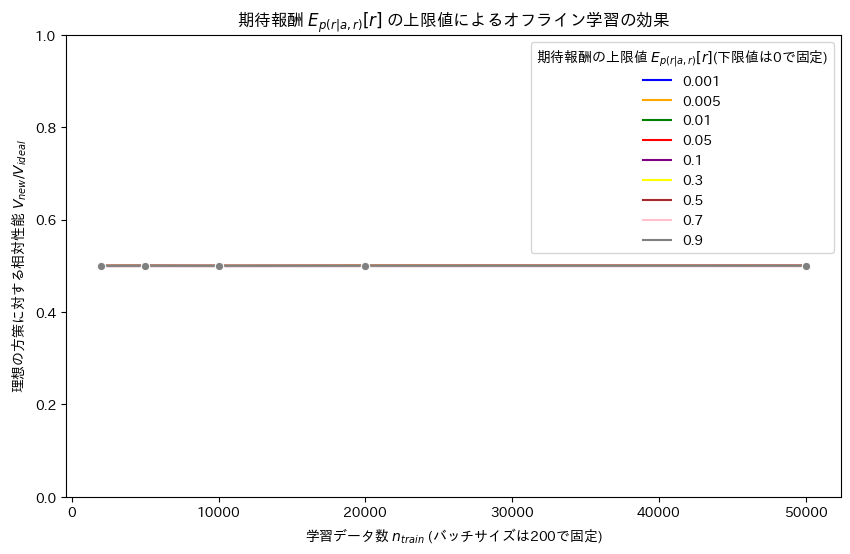

In [50]:
def draw_plot_by_reward_scale(result_df: DataFrame[SimulationResult]) -> None:
    # 横軸 n_rounds_train, 縦軸 new_policy_value, hue=n_actionsでplot
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=result_df.to_pandas(),
        x="n_rounds_train",
        y="relative_new_policy_value",
        hue="expected_reward_upper",
        marker="o",
        palette={
            0.001: "blue",
            0.005: "orange",
            0.01: "green",
            0.05: "red",
            0.1: "purple",
            0.3: "yellow",
            0.5: "brown",
            0.7: "pink",
            0.9: "gray",
        },
    )
    plt.xlabel(r"学習データ数 $n_{train}$ (バッチサイズは200で固定)")
    plt.ylabel(r"理想の方策に対する相対性能 $V_{new} / V_{ideal}$")
    plt.title(r"期待報酬 $E_{p(r|a,r)}[r]$ の上限値によるオフライン学習の効果")
    plt.legend(title=r"期待報酬の上限値 $E_{p(r|a,r)}[r]$(下限値は0で固定)")
    plt.ylim(0.0, 1.0)
    plt.show()


draw_plot_by_reward_scale(result_df)